### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('preprocessed_articles.csv')

In [6]:
df.dropna(inplace = True)

In [7]:
corpus = df['text']

In [8]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [9]:
X.shape

(18195, 5000)

In [10]:
y=df['label']

In [11]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
from collections import Counter

label_counts = Counter(y)
total_samples = len(y)

# Print the results
print(f"Total number of samples: {total_samples}")
print(f"Number of samples with label 0: {label_counts[0]}")
print(f"Number of samples with label 1: {label_counts[1]}")

Total number of samples: 18195
Number of samples with label 0: 10360
Number of samples with label 1: 7835


In [13]:
cv.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access'], dtype=object)

In [14]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [15]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [16]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [21]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [22]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


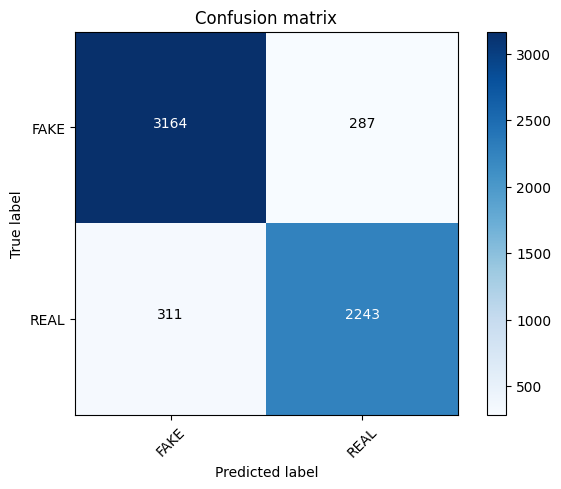

In [23]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [24]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9004163197335554

In [25]:
y_train.shape

(12190,)

### Passive Aggressive Classifier Algorithm

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.940
Confusion matrix, without normalization


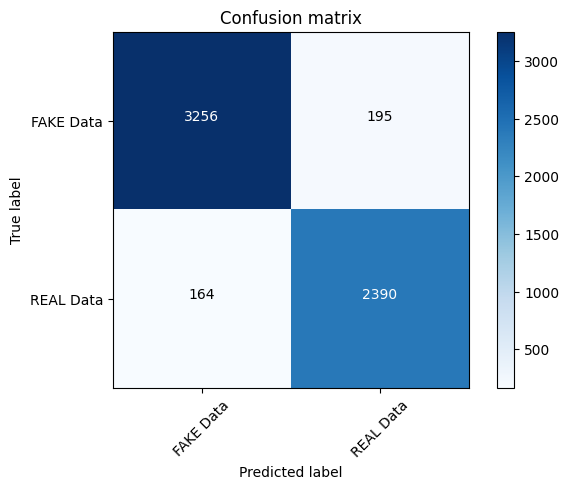

In [27]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [28]:
from sklearn.metrics import fbeta_score

# Calculate precision, recall, f1-score, and other metrics
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f2_score = fbeta_score(y_test, pred, beta=2)
roc_auc = metrics.roc_auc_score(y_test, pred)
average_precision = metrics.average_precision_score(y_test, pred)

# Print the metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F2 Score: {f2_score:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Average Precision: {average_precision:.3f}")

Precision: 0.925
Recall: 0.936
F2 Score: 0.934
ROC AUC: 0.940
Average Precision: 0.893


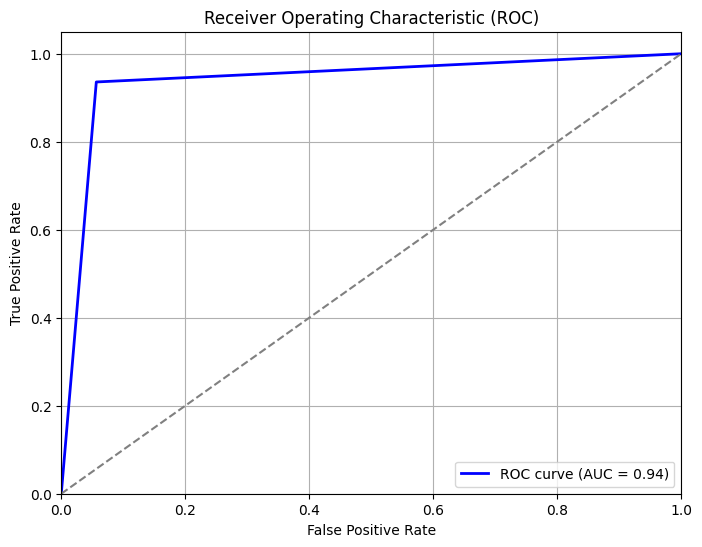

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your classifier and made predictions 'pred' on X_test

# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# def preprocess_title(title):
#     ps = PorterStemmer()
#     review = re.sub('[^a-zA-Z]', ' ', title)
#     review = review.lower()
#     review = review.split()
#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     return review
# i = 10
# input_text = df['text'][i]
# preprocessed_title = preprocess_title(input_text)

# # Transform the input text using the fitted CountVectorizer
# title_vector = cv.transform([preprocessed_title]).toarray()

# # Perform prediction
# prediction = linear_clf.predict(title_vector)
# prediction_proba = linear_clf._predict_proba_lr(title_vector)

# print(df['label'][i], "\n")
# print(prediction, " ", prediction_proba)

0 

[0]   [[9.99999779e-01 2.20603479e-07]]


### Multinomial Classifier with Hyperparameter

In [31]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

Best Model ROC AUC Score: 0.9568642788527515


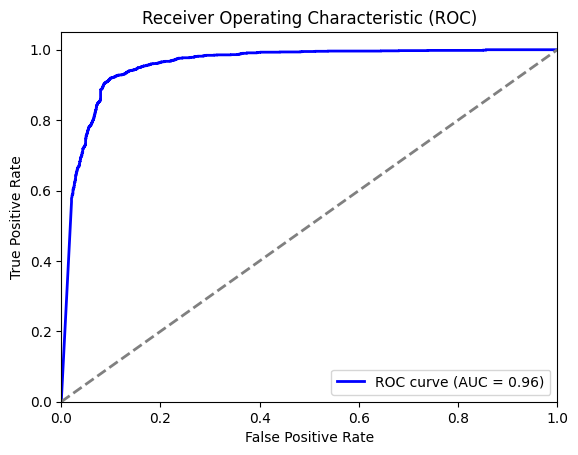

In [ ]:
# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MultinomialNB model
classifier = MultinomialNB()

# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict probabilities
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'Best Model ROC AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [53]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

ValueError: Found input variables with inconsistent numbers of samples: [1, 3657]

In [108]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [109]:
classifier.feature_log_prob_[0]

array([ -9.78410645,  -9.02396187,  -9.07640214, ..., -11.44911422,
        -8.94638357, -14.30073299])

In [110]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(np.float64(-4.18090603348514), 'mr'),
 (np.float64(-4.2145752561336405), 'said'),
 (np.float64(-4.847244188383524), 'trump'),
 (np.float64(-5.271668404933173), 'state'),
 (np.float64(-5.272804704129353), 'one'),
 (np.float64(-5.3136085392758385), 'would'),
 (np.float64(-5.37752045702385), 'year'),
 (np.float64(-5.44775200556575), 'peopl'),
 (np.float64(-5.465974499180364), 'new'),
 (np.float64(-5.490328303653834), 'like'),
 (np.float64(-5.496629075075569), 'presid'),
 (np.float64(-5.524996589142134), 'time'),
 (np.float64(-5.612341276434545), 'mr trump'),
 (np.float64(-5.6854678845363384), 'also'),
 (np.float64(-5.824153480367098), 'say'),
 (np.float64(-5.900085441128807), 'ms'),
 (np.float64(-5.928395215926233), 'american'),
 (np.float64(-5.942486168803436), 'work'),
 (np.float64(-5.955527563862452), 'go'),
 (np.float64(-5.956277948469754), 'could')]

In [111]:
### Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:5000]

[(np.float64(-15.04794739072826), 'auf'),
 (np.float64(-15.04794739072826), 'en el'),
 (np.float64(-15.04794739072826), 'fli zone'),
 (np.float64(-15.04794739072826), 'html'),
 (np.float64(-15.04794739072826), 'http co'),
 (np.float64(-15.04794739072826), 'http www'),
 (np.float64(-15.04794739072826), 'infowar life'),
 (np.float64(-15.04794739072826), 'pic twitter com'),
 (np.float64(-15.04794739072826), 'ufo'),
 (np.float64(-15.04794739072826), 'utm'),
 (np.float64(-14.300732988898037), 'brain forc'),
 (np.float64(-14.300732988898037), 'como'),
 (np.float64(-14.300732988898037), 'ein'),
 (np.float64(-14.300732988898037), 'infowar com'),
 (np.float64(-14.300732988898037), 'ist'),
 (np.float64(-14.300732988898037), 'oligarchi'),
 (np.float64(-14.300732988898037), 'twitter com'),
 (np.float64(-14.300732988898037), 'una'),
 (np.float64(-14.300732988898037), 'zu'),
 (np.float64(-13.877876138078005), 'kadzik'),
 (np.float64(-13.581610321934832), 'creamer'),
 (np.float64(-13.581610321934832)

In [46]:
# For scikit-learn
import joblib
joblib.dump(best_model, 'fake_news_classifier.pkl')

['fake_news_classifier.pkl']

In [113]:
joblib.dump(cv, 'count_vectorizer.pkl')

['count_vectorizer.pkl']